In [1]:
# Read data from MXene_Dataset.xlsx

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Read data from MXene_Dataset.xlsx
df = pd.read_excel('MXene_Dataset.xlsx')

In [4]:
df.describe()

,X,Y,Z,Charge,Sigma,Epsilon,Cell_a,Cell_b,Cell_c,Alpha,Beta,Gamma,0.1Bar_CO2,1Bar_CO2,10Bar_CO2,0.1Bar_CH4,1Bar_CH4,10Bar_CH4
count,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000
mean,0.458369,0.476855,0.352892,0.000004,56.938755,3.161190,5.430977,3.947409,15.013314,90.118457,88.729595,119.956440,0.008073,0.068207,0.365784,0.002427,0.021050,0.110782
std,0.286661,0.286640,0.207802,0.698211,52.307880,0.408197,1.756661,1.533863,1.640564,1.194510,3.112785,0.337344,0.023560,0.121041,0.426382,0.003437,0.025037,0.092099
min,0.000000,0.000000,0.000020,-10.427000,7.553300,2.571100,2.044687,1.770532,14.000000,67.950100,66.302600,118.242100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.180200,0.307240,0.202800,-0.511000,28.199100,2.801000,3.099300,2.650698,14.000000,89.989100,89.475600,119.867700,0.000448,0.004417,0.035663,0.000231,0.002077,0.017557
50%,0.458930,0.488620,0.321790,-0.107000,34.745300,3.118100,6.350805,2.921591,14.000000,90.009600,89.982100,119.999800,0.001679,0.016869,0.173787,0.001119,0.011226,0.103243
75%,0.670100,0.671620,0.468950,0.582000,52.873400,3.430900,6.793687,5.699622,15.000000,90.100700,90.063000,120.040100,0.008203,0.083490,0.661919,0.003333,0.032675,0.176521
max,0.999990,0.999990,0.999980,4.048000,200.415000,4.009000,7.834587,6.741187,20.000000,100.216500,111.088500,121.631400,0.720121,1.825252,4.367491,0.027696,0.131258,0.531220


In [33]:
# Normalize every numerical column except for targets
targets = ['0.1Bar_CO2', '1Bar_CO2', '10Bar_CO2', '0.1Bar_CH4', '1Bar_CH4', '10Bar_CH4']
numerical_columns = [col for col in df.columns if col not in targets]
numerical_columns = [col for col in numerical_columns if df[col].dtype in [np.float64, np.int64]]
# Normalize to be between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [8]:
df.describe()

,X,Y,Z,Charge,Sigma,Epsilon,Cell_a,Cell_b,Cell_c,Alpha,Beta,Gamma,0.1Bar_CO2,1Bar_CO2,10Bar_CO2,0.1Bar_CH4,1Bar_CH4,10Bar_CH4
count,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000
mean,0.458374,0.476860,0.352886,0.720346,0.256067,0.410384,0.584862,0.437946,0.168886,0.687042,0.500760,0.505810,0.008073,0.068207,0.365784,0.002427,0.021050,0.110782
std,0.286664,0.286643,0.207810,0.048236,0.271220,0.283884,0.303401,0.308584,0.273427,0.037020,0.069504,0.099532,0.023560,0.121041,0.426382,0.003437,0.025037,0.092099
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.180202,0.307243,0.202788,0.685043,0.107050,0.159886,0.182147,0.177072,0.000000,0.683033,0.517417,0.479627,0.000448,0.004417,0.035663,0.000231,0.002077,0.017557
50%,0.458935,0.488625,0.321783,0.712953,0.140992,0.380416,0.743729,0.231571,0.000000,0.683668,0.528727,0.518603,0.001679,0.016869,0.173787,0.001119,0.011226,0.103243
75%,0.670107,0.671627,0.468949,0.760553,0.234988,0.597955,0.820221,0.790457,0.166667,0.686491,0.530533,0.530493,0.008203,0.083490,0.661919,0.003333,0.032675,0.176521
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.720121,1.825252,4.367491,0.027696,0.131258,0.531220


In [39]:
# Read data from enhanced_lj_data.xlsx
df2 = pd.read_excel('enhanced_lj_data.xlsx')

In [10]:
df2.describe()

,Epsilon,Sigma,AtomicNumber,AtomicRadius,Electronegativity,Atomic Weight,Electron Affinity,Ionization Energy,Polarizability,Oxidation State,Coordination Number,Atomic Volume,Thermal Conductivity,Specific Heat Capacity
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,68.170539,3.152628,52.000000,1.690291,1.641748,126.850619,0.612922,7.983971,83.333204,3.155340,6.087379,17.594951,54.874910,0.546194
std,85.075607,0.512177,29.877528,0.565192,0.703842,78.405454,0.824066,3.311971,82.693778,2.577266,2.205638,12.041189,77.584338,1.513790
min,2.517800,2.104300,1.000000,0.310000,0.000000,1.008000,0.000000,3.894000,0.200000,-3.000000,0.000000,4.600000,0.000094,0.073000
25%,7.553300,2.799650,26.500000,1.450000,1.220000,57.269000,0.000000,6.025500,25.000000,2.000000,6.000000,9.750000,10.050000,0.132000
50%,25.177800,3.028200,52.000000,1.710000,1.550000,126.900000,0.300000,6.828000,45.000000,3.000000,6.000000,15.400000,22.000000,0.228000
75%,116.572500,3.555600,77.500000,2.050000,2.075000,193.650000,0.850000,8.997000,145.000000,5.000000,8.000000,20.200000,71.700000,0.449000
max,342.417000,4.365400,103.000000,2.980000,3.980000,260.000000,3.613000,24.587000,400.000000,8.000000,8.000000,71.070000,429.000000,14.304000


In [42]:
# Drop Charge and Epsilon columns from df2
df2 = df2.drop(columns=['Epsilon', 'Sigma'])


In [43]:
# Atom column in df is Element column in df2
# Find every unique atom in df and find the corresponding rows in df2
# Remove every other element from df2
# Normalize every numerical column in df2 (there are no targets in df2)
# Merge df and df2 based on the Atom name of each row
# Save the merged dataframe as a new Excel file

# Find every unique atom in df
atoms = df['Atom'].unique()

# Find the corresponding rows in df2
df2 = df2[df2['Element'].isin(atoms)]

# Remove the rows with elements that are not in df
df2 = df2[df2['Element'].isin(atoms)]

# Normalize every numerical column in df2
numerical_columns = [col for col in df2.columns if col not in ['Element']]
numerical_columns = [col for col in numerical_columns if df2[col].dtype in [np.float64, np.int64]]
# Normalize to be between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[numerical_columns] = scaler.fit_transform(df2[numerical_columns])

# Merge df and df2 based on the Atom name of each row
df = df.merge(df2, left_on='Atom', right_on='Element', how='left')
df.describe()

,X,Y,Z,Charge,Sigma,Epsilon,Cell_a,Cell_b,Cell_c,Alpha,...,Electronegativity,Atomic Weight,Electron Affinity,Ionization Energy,Polarizability,Oxidation State,Coordination Number,Atomic Volume,Thermal Conductivity,Specific Heat Capacity
count,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,...,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000
mean,0.458374,0.476860,0.352886,0.720346,0.256067,0.410384,0.584862,0.437946,0.168886,0.687042,...,0.388644,0.348950,0.296066,0.340322,0.291964,0.556464,0.779798,0.340773,0.277450,0.062969
std,0.286664,0.286643,0.207810,0.048236,0.271220,0.283884,0.303401,0.308584,0.273427,0.037020,...,0.260437,0.302002,0.310032,0.282703,0.317646,0.343584,0.324996,0.310245,0.307798,0.183754
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.180202,0.307243,0.202788,0.685043,0.107050,0.159886,0.182147,0.177072,0.000000,0.683033,...,0.137681,0.071098,0.019374,0.054257,0.010047,0.222222,0.600000,0.021739,0.092479,0.009245
50%,0.458935,0.488625,0.321783,0.712953,0.140992,0.380416,0.743729,0.231571,0.000000,0.683668,...,0.413043,0.256295,0.193745,0.310816,0.162760,0.666667,1.000000,0.288043,0.149127,0.025053
75%,0.670107,0.671627,0.468949,0.760553,0.234988,0.597955,0.820221,0.790457,0.166667,0.686491,...,0.630435,0.502636,0.404373,0.602356,0.439049,0.777778,1.000000,0.554348,0.332365,0.040649
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
# Normalize targets in df
numerical_columns = [col for col in df.columns if col in targets]
numerical_columns = [col for col in numerical_columns if df[col].dtype in [np.float64, np.int64]]
# Normalize to be between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Save the merged dataframe as a new Excel file
df.to_excel('MXene_Dataset_Enhanced.xlsx', index=False)

In [44]:
# Save the merged dataframe as a new Excel file
df.to_excel('MXene_Dataset_Enhanced.xlsx', index=False)

In [4]:
# Load the new Excel file
import pandas as pd
df = pd.read_excel('MXene_Dataset_Enhanced.xlsx')
df.describe()

,X,Y,Z,Charge,Sigma,Epsilon,Cell_a,Cell_b,Cell_c,Alpha,...,Electronegativity,Atomic Weight,Electron Affinity,Ionization Energy,Polarizability,Oxidation State,Coordination Number,Atomic Volume,Thermal Conductivity,Specific Heat Capacity
count,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,...,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000,105377.000000
mean,0.458374,0.476860,0.352886,0.720346,0.256067,0.410384,0.584862,0.437946,0.168886,0.687042,...,0.388644,0.348950,0.296066,0.340322,0.291964,0.556464,0.779798,0.340773,0.277450,0.062969
std,0.286664,0.286643,0.207810,0.048236,0.271220,0.283884,0.303401,0.308584,0.273427,0.037020,...,0.260437,0.302002,0.310032,0.282703,0.317646,0.343584,0.324996,0.310245,0.307798,0.183754
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.180202,0.307243,0.202788,0.685043,0.107050,0.159886,0.182147,0.177072,0.000000,0.683033,...,0.137681,0.071098,0.019374,0.054257,0.010047,0.222222,0.600000,0.021739,0.092479,0.009245
50%,0.458935,0.488625,0.321783,0.712953,0.140992,0.380416,0.743729,0.231571,0.000000,0.683668,...,0.413043,0.256295,0.193745,0.310816,0.162760,0.666667,1.000000,0.288043,0.149127,0.025053
75%,0.670107,0.671627,0.468949,0.760553,0.234988,0.597955,0.820221,0.790457,0.166667,0.686491,...,0.630435,0.502636,0.404373,0.602356,0.439049,0.777778,1.000000,0.554348,0.332365,0.040649
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Create Correlation Matrix with Targets
numerical_columns = [col for col in df.columns if col not in ['Atom', 'Element','Mxene']]
corr = df[numerical_columns].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with Targets')
plt.show()


NameError: name 'plt' is not defined

In [13]:
# Print the correlations overf .75 and under -0.75
correlations = corr.unstack().sort_values(ascending=False)
correlations = correlations[correlations != 1]
correlations = correlations[(correlations > 0.75) | (correlations < -0.75)]
print(correlations)


AtomicNumber         Atomic Weight          0.998817
Atomic Weight        AtomicNumber           0.998817
0.1Bar_CH4           1Bar_CH4               0.967550
1Bar_CH4             0.1Bar_CH4             0.967550
Ionization Energy    Electronegativity      0.914742
Electronegativity    Ionization Energy      0.914742
1Bar_CO2             0.1Bar_CO2             0.877794
0.1Bar_CO2           1Bar_CO2               0.877794
Sigma                Epsilon                0.873723
Epsilon              Sigma                  0.873723
Polarizability       AtomicRadius           0.809093
AtomicRadius         Polarizability         0.809093
                     AtomicNumber           0.780349
AtomicNumber         AtomicRadius           0.780349
10Bar_CO2            1Bar_CO2               0.769116
1Bar_CO2             10Bar_CO2              0.769116
AtomicRadius         Coordination Number    0.761334
Coordination Number  AtomicRadius           0.761334
Atomic Weight        AtomicRadius           0.

In [39]:
# Create directories for graphs, their 2D projections and the 3D projections
import os
base_dir = 'Graphs'
os.makedirs(base_dir, exist_ok=True)
os.makedirs(os.path.join(base_dir, '2D'), exist_ok=True)
os.makedirs(os.path.join(base_dir, '3D'), exist_ok=True)

In [40]:
# Pick a distance threshold
distance_threshold = 0.35
mxene_names = df['Mxene'].unique()

In [41]:
import torch
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from torch_geometric.utils import from_networkx
import matplotlib.pyplot as plt

In [42]:
for mxene in mxene_names:
    mxene_subset = df[df["Mxene"] == mxene].copy()  # Explicit copy to avoid view
    atom_names = mxene_subset["Atom"]
    atom_properties = mxene_subset[
        ["Atom", "X", "Y", "Z", "Charge", "Sigma", "Epsilon", "AtomicNumber", "AtomicRadius", "Electronegativity", "Atomic Weight", "Electron Affinity", "Ionization Energy", "Polarizability", "Oxidation State", "Coordination Number", "Atomic Volume", "Thermal Conductivity", "Specific Heat Capacity"]].copy()  # Ensure a copy
    mxene_properties = (
        mxene_subset[["Cell_a", "Cell_b", "Cell_c", "Alpha", "Beta", "Gamma"]]
        .iloc[0]
        .values
    )
    target = mxene_subset[["1Bar_CO2", "1Bar_CH4"]].iloc[0].values

    # Ensure all atoms are unique (handle duplicate atoms)
    atom_properties["Atom"] = (
        atom_properties.groupby("Atom")
        .cumcount()
        .add(1)
        .astype(str)
        .radd(atom_properties["Atom"])
    )

    # Create graph
    G = nx.Graph()
    for i, row in atom_properties.iterrows():
        G.add_node(
            row["Atom"], **row.drop("Atom").to_dict()
        )  # Add atom properties as node features

    # Add edges based on Euclidean distance
    for u in G.nodes:
        u_data = G.nodes[u]
        min_distance = float("inf")
        closest_node = None

        for v in G.nodes:
            if u != v:  # Skip self-connections
                v_data = G.nodes[v]
                distance = np.sqrt(
                    (u_data["X"] - v_data["X"]) ** 2
                    + (u_data["Y"] - v_data["Y"]) ** 2
                    + (u_data["Z"] - v_data["Z"]) ** 2
                )

                if distance < min_distance:
                    min_distance = distance
                    closest_node = v

        if closest_node is not None:
            G.add_edge(u, closest_node, distance=min_distance)

    # Identify connected components
    components = list(nx.connected_components(G))  # List of components (sets of nodes)

    # Connect components by adding edges between their closest nodes
    while len(components) > 1:
        component_1 = components.pop()
        component_2 = components.pop()

        min_distance = float("inf")
        closest_pair = None

        for u in component_1:
            u_data = G.nodes[u]

            for v in component_2:
                v_data = G.nodes[v]

                # Calculate the distance between nodes from different components
                distance = np.sqrt(
                    (u_data["X"] - v_data["X"]) ** 2
                    + (u_data["Y"] - v_data["Y"]) ** 2
                    + (u_data["Z"] - v_data["Z"]) ** 2
                )

                if distance < min_distance:
                    min_distance = distance
                    closest_pair = (u, v)

        # Add the edge between the closest nodes of the two components
        if closest_pair is not None:
            u, v = closest_pair
            G.add_edge(u, v, distance=min_distance)

        # Add the newly connected component to the list of components
        new_component = component_1.union(component_2)
        components.append(new_component)

    # Add edges based on distance threshold
    for u in G.nodes:
        u_data = G.nodes[u]
        for v in G.nodes:
            if u != v:
                v_data = G.nodes[v]
                distance = np.sqrt(
                    (u_data["X"] - v_data["X"]) ** 2
                    + (u_data["Y"] - v_data["Y"]) ** 2
                    + (u_data["Z"] - v_data["Z"]) ** 2
                )
                if distance < distance_threshold:
                    G.add_edge(u, v, distance=distance)

    # Convert to torch_geometric graph
    graph = from_networkx(G)

    # Extract node features (charge, sigma, epsilon, etc.)
    node_features = atom_properties[
        [
            "Charge",
            "Sigma",
            "Epsilon",
            "AtomicNumber",
            "AtomicRadius",
            "Electronegativity",
            "Atomic Weight",
            "Electron Affinity",
            "Ionization Energy",
            "Polarizability",
            "Oxidation State",
            "Coordination Number",
            "Atomic Volume",
            "Thermal Conductivity",
            "Specific Heat Capacity",
        ]
    ].values

    # Ensure the features are in the shape (num_nodes, 15)
    graph.x = torch.tensor(node_features, dtype=torch.float)
    # Extract edge distances and add as 'edge_attr'
    edge_distances = nx.get_edge_attributes(G, "distance")
    edge_distances = np.array([edge_distances[edge] for edge in G.edges])
    graph.edge_attr = torch.tensor(edge_distances, dtype=torch.float).unsqueeze(-1)
    del graph.distance

    # Extract node positions (X, Y, Z) and add as 'pos'
    node_positions = atom_properties[["X", "Y", "Z"]].values
    graph.pos = torch.tensor(node_positions, dtype=torch.float)

    # Target variable (1Bar_CO2, 1Bar_CH4) for regression
    graph.y = torch.tensor(target, dtype=torch.float)

    # MXene properties
    graph.mxene_properties = torch.tensor(mxene_properties, dtype=torch.float)
    del graph.X
    del graph.Y
    del graph.Z
    del graph.Charge
    del graph.Sigma
    del graph.Epsilon
    del graph.AtomicNumber
    del graph.AtomicRadius
    del graph.Electronegativity
    del graph["Atomic Weight"]
    del graph["Electron Affinity"]
    del graph["Ionization Energy"]
    del graph["Oxidation State"]
    del graph["Coordination Number"]
    del graph["Atomic Volume"]
    del graph["Thermal Conductivity"]
    del graph["Specific Heat Capacity"]
    del graph["Polarizability"]
    # Step 1: Convert edge_index into a list of edges and filter out reverse edges
    edges = graph.edge_index.t().tolist()  # Transpose edge_index and convert to list
    unique_edges = []

    # Step 2: Create a set to keep track of edges we have already added
    seen_edges = set()

    for edge in edges:
        # Create an ordered edge tuple (min, max) to handle (a, b) and (b, a) as the same
        edge_tuple = tuple(sorted(edge))
        if edge_tuple not in seen_edges:
            unique_edges.append(edge)
            seen_edges.add(edge_tuple)  # Mark this edge as seen

    # Step 3: Update graph's edge_index with the unique edges (convert back to tensor)
    graph.edge_index = torch.tensor(unique_edges).t().contiguous()

    # Save the graph
    torch.save(graph, os.path.join(base_dir, f"{mxene}.pt"))

    # Node color mapping based on categories
    node_colors = []
    M_layer_elements = ["Cr", "Hf", "Mo", "Nb", "Sc", "Ta", "Ti", "V", "W", "Y", "Zr"]
    X_layer_elements = ["C", "N"]
    T_layer_elements = ["Cl", "F", "H", "I", "O", "S", "Se", "Te"]

    # Assign colors based on the layer
    for atom in atom_properties["Atom"]:
        if atom[0] in M_layer_elements:
            node_colors.append("red")
        elif atom[0] in X_layer_elements:
            node_colors.append("green")
        elif atom[0] in T_layer_elements:
            node_colors.append("blue")
        else:
            node_colors.append("yellow")

    # Plot the 2D graph
    plt.figure(figsize=(10, 10))
    pos_2d = nx.spring_layout(G, seed=42)
    nx.draw(
        G,
        pos_2d,
        with_labels=True,
        node_size=3000,
        node_color=node_colors,
        font_size=8,
        font_weight="bold",
        font_color="black",
    )
    edge_labels = nx.get_edge_attributes(G, "distance")
    rounded_edge_labels = {
        k: f"{v:.2f}" for k, v in edge_labels.items()
    }  # Round distances
    nx.draw_networkx_edge_labels(
        G, pos_2d, edge_labels=rounded_edge_labels, font_color="red"
    )
    plt.title(f"{mxene} Graph (2D)")
    plt.axis("off")
    plt.savefig(os.path.join(base_dir, f"2D/{mxene}.png"))
    plt.close()

    # Plot the 3D graph
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection="3d")
    for u, v, d in G.edges(data=True):
        ax.plot(
            [G.nodes[u]["X"], G.nodes[v]["X"]],
            [G.nodes[u]["Y"], G.nodes[v]["Y"]],
            [G.nodes[u]["Z"], G.nodes[v]["Z"]],
            color="skyblue",
        )

    # Scatter nodes with colors and annotate atom names
    for node, color in zip(G.nodes, node_colors):
        x, y, z = G.nodes[node]["X"], G.nodes[node]["Y"], G.nodes[node]["Z"]
        ax.scatter(x, y, z, color=color, s=100)  # Scatter node
        ax.text(x, y, z, node, fontsize=8, fontweight="bold")

    ax.set_title(f"{mxene} 3D Graph")
    plt.savefig(os.path.join(base_dir, f"3D/{mxene}.png"))
    plt.close()

In [43]:
# Load the graphs
import os
import torch
graphs = []
for mxene in mxene_names:
    graph = torch.load(os.path.join(base_dir, f"{mxene}.pt"))
    graphs.append(graph)

C:\Users\PC\AppData\Local\Temp\ipykernel_28436\2452122789.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  graph = torch.load(os.path.join(base_dir, f"{mxene}.pt"))


In [8]:
# Print some information about all and the first graph
print(f"Number of graphs: {len(graphs)}")
print(graphs[0])
print(graphs[0].x[0])
print(graphs[0].edge_index)
print(graphs[0].edge_attr)
print(graphs[0].pos[0])
print(graphs[0].y)
print(graphs[0].mxene_properties)


Number of graphs: 9435
Data(edge_index=[2, 9], num_nodes=10, x=[10, 15], edge_attr=[9, 1], pos=[10, 3], y=[2], mxene_properties=[6])
tensor([0.7648, 0.0000, 0.0849, 0.3151, 0.6703, 0.1594, 0.2789, 0.1843, 0.0491,
        0.6902, 1.0000, 1.0000, 0.1049, 0.5433, 0.0222])
tensor([[0, 0, 0, 1, 1, 2, 3, 3, 4],
        [9, 5, 8, 8, 3, 7, 6, 7, 6]])
tensor([[0.2627],
        [0.3765],
        [0.3736],
        [0.2627],
        [0.5210],
        [0.2595],
        [0.2595],
        [0.4100],
        [0.4307]])
tensor([0.6565, 0.6563, 0.2221])
tensor([0.0458, 0.0254])
tensor([0.8496, 0.2534, 0.0000, 0.6848, 0.5383, 0.5892])


In [9]:
# Implementation of the Graph Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool, EdgeConv
from torch_geometric.data import Data
from torch_geometric.nn import NNConv

class GNN(torch.nn.Module):
    def __init__(self, node_feature_dim, edge_feature_dim, hidden_channels, mxene_feature_dim=None):
        super(GNN, self).__init__()
        
        # Define edge update networks
        edge_network1 = nn.Sequential(
            nn.Linear(edge_feature_dim, hidden_channels),
            nn.ReLU(),
            nn.Linear(hidden_channels, node_feature_dim * hidden_channels)
        )
        edge_network2 = nn.Sequential(
            nn.Linear(edge_feature_dim, hidden_channels),
            nn.ReLU(),
            nn.Linear(hidden_channels, hidden_channels * hidden_channels)
        )
        
        # Graph Convolution Layers
        self.conv1 = NNConv(node_feature_dim, hidden_channels, edge_network1, aggr='mean')
        self.conv2 = NNConv(hidden_channels, hidden_channels, edge_network2, aggr='mean')
        
        # Linear layer for graph-level features if provided
        if mxene_feature_dim:
            self.fc_mxene = nn.Linear(mxene_feature_dim, hidden_channels)
        else:
            self.fc_mxene = None
        
        # Fully connected output layer
        self.fc_out = nn.Linear(hidden_channels * 2 if mxene_feature_dim else hidden_channels, 2)
        
    def forward(self, data):
        # Extract components from `data`
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        
        # Ensure the correct dtype
        x = x.float()
        edge_attr = edge_attr.float()
        
        # Debugging print statements
        # print(f"Node features shape: {x.shape}")
        # print(f"Edge index shape: {edge_index.shape}")
        # print(f"Edge attributes shape: {edge_attr.shape}")
        
        # Apply Graph Convolution layers with edge attributes
        x = self.conv1(x, edge_index, edge_attr)
        x = F.relu(x)
        # print(f"Node embeddings shape after conv1: {x.shape}")
        
        x = self.conv2(x, edge_index, edge_attr)
        x = F.relu(x)
        # print(f"Node embeddings shape after conv2: {x.shape}")
        
        # Apply global mean pooling to get graph-level representation
        graph_features = global_mean_pool(x, data.batch)
        # print(f"Graph-level representation shape after pooling: {graph_features.shape}")
        
        # Incorporate mxene-level properties if available
        if self.fc_mxene:
            mxene_properties = data.mxene_properties.float()
            # print(f"mxene_properties shape before reshape: {mxene_properties.shape}")
            
            # Ensure mxene_properties has shape [batch_size, mxene_feature_dim]
            batch_size = graph_features.size(0)  # Batch size inferred from graph-level representation
            mxene_properties = mxene_properties.view(batch_size, -1)  # Reshape to [batch_size, mxene_feature_dim]
            # print(f"mxene_properties shape after reshape: {mxene_properties.shape}")
            
            mxene_features = self.fc_mxene(mxene_properties)
            # print(f"mxene_features shape after fc_mxene: {mxene_features.shape}")
            
            # Concatenate graph features and mxene features
            graph_features = torch.cat([graph_features, mxene_features], dim=1)
            # print(f"Graph features shape after concatenation: {graph_features.shape}")
        
        # Final output layer
        output = self.fc_out(graph_features)
        # print(f"Final output shape: {output.shape}")
        
        return output

In [48]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(graphs, test_size=0.3, random_state=42)
validation_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)
test_data1, test_data2 = train_test_split(test_data, test_size=0.5, random_state=42)

# Train data is used for training
# Validation data is used for validation during training
# Test data1 is used for testing the final model
# Test data2 is used for demo purposes

In [49]:
# Print the number of graphs in each set
print(f"Number of training graphs: {len(train_data)}")
print(f"Number of validation graphs: {len(validation_data)}")
print(f"Number of test graphs1: {len(test_data1)}")
print(f"Number of test graphs2: {len(test_data2)}")

Number of training graphs: 6604
Number of validation graphs: 1415
Number of test graphs1: 708
Number of test graphs2: 708


In [50]:
# Define the parameters for the GNN
node_feature_dim = 15
edge_feature_dim = 1
hidden_channels = 64
mxene_feature_dim = 6

In [51]:
# CUDA availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device  

device(type='cuda')

In [52]:
# Initialize the model
model = GNN(node_feature_dim, edge_feature_dim, hidden_channels, mxene_feature_dim)
model.to(device)  # Move model to CUDA if available

# Define the optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Define the loss function
criterion = nn.MSELoss()

In [15]:
# Define the training loop
def train(model, optimizer, criterion, data_loader):
    model.train()
    total_loss = 0
    
    for data in data_loader:
        data = data.to(device)
        optimizer.zero_grad()
        output = model(data)
        
        # Ensure output and target shapes match
        output = output.view(-1)  # Reshapes to match target if batch size is 1
        
        loss = criterion(output, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    return total_loss / len(data_loader)

In [16]:
# Define the evaluation loop
def evaluate(model, criterion, data_loader):
    model.eval()
    total_loss = 0
    
    with torch.no_grad():
        for data in data_loader:
            data = data.to(device)
            output = model(data)
            
            # Ensure output and target shapes match
            output = output.view(-1)  # Reshapes to match target if batch size is 1
            
            loss = criterion(output, data.y)
            total_loss += loss.item()
    
    return total_loss / len(data_loader)

In [17]:
# Calculate the predictions
def predict(model, data_loader):
    model.eval()
    predictions = []
    
    with torch.no_grad():
        for data in data_loader:
            data = data.to(device)
            output = model(data)
            predictions.append(output.cpu().numpy())
    
    return np.vstack(predictions)

In [53]:
from torch_geometric.loader import DataLoader
# Define the data loaders
train_loader = DataLoader(train_data, batch_size=1, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=1)
test_loader1 = DataLoader(test_data1, batch_size=1)
test_loader2 = DataLoader(test_data2, batch_size=1)

In [54]:
# Train the model
num_epochs = 10
train_losses = []
validation_losses = []

for epoch in range(num_epochs):
    train_loss = train(model, optimizer, criterion, train_loader)
    validation_loss = evaluate(model, criterion, validation_loader)
    train_losses.append(train_loss)
    validation_losses.append(validation_loss)
    print(f"Epoch {epoch + 1}, Train Loss: {train_loss:.4f}, Validation Loss: {validation_loss:.4f}")

Epoch 1, Train Loss: 0.0103, Validation Loss: 0.0074
Epoch 2, Train Loss: 0.0074, Validation Loss: 0.0062
Epoch 3, Train Loss: 0.0061, Validation Loss: 0.0060
Epoch 4, Train Loss: 0.0050, Validation Loss: 0.0053
Epoch 5, Train Loss: 0.0043, Validation Loss: 0.0041
Epoch 6, Train Loss: 0.0036, Validation Loss: 0.0038
Epoch 7, Train Loss: 0.0033, Validation Loss: 0.0032
Epoch 8, Train Loss: 0.0029, Validation Loss: 0.0031
Epoch 9, Train Loss: 0.0026, Validation Loss: 0.0029
Epoch 10, Train Loss: 0.0024, Validation Loss: 0.0026


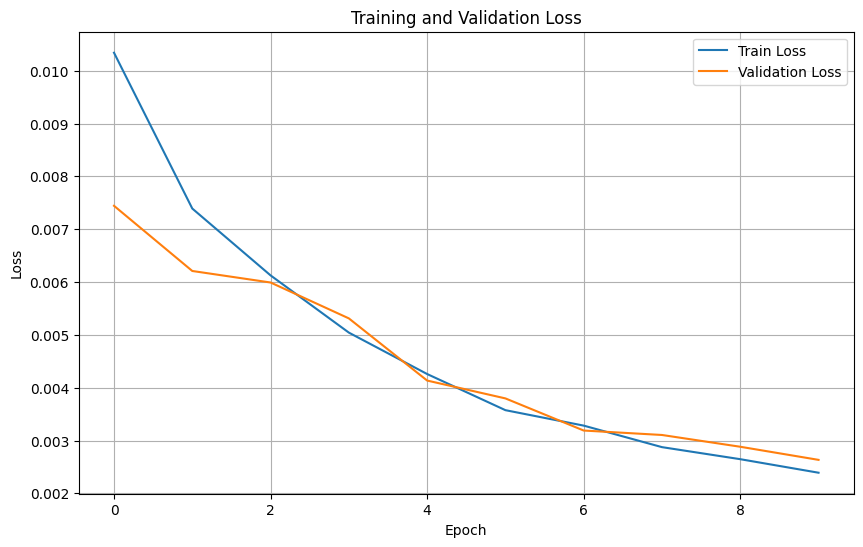

In [55]:
# Plot the training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show() 

In [56]:
# Evaluate the model on the test set
test_loss1 = evaluate(model, criterion, test_loader1)

print(f"Test Loss 1: {test_loss1:.4f}")

Test Loss 1: 0.0025


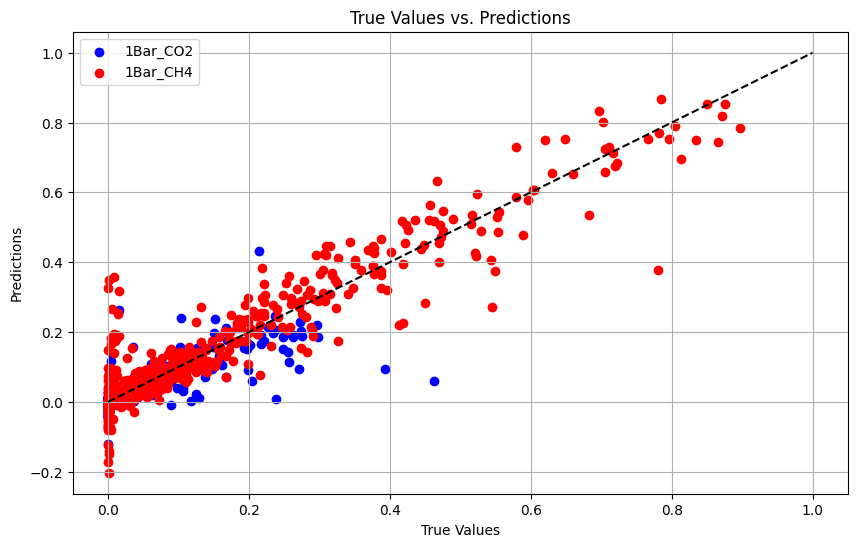

In [57]:
# Plot the predictions against the true values
predictions = predict(model, test_loader1)
true_values = np.vstack([data.y.cpu().numpy() for data in test_loader1])

plt.figure(figsize=(10, 6))
plt.scatter(true_values[:, 0], predictions[:, 0], label='1Bar_CO2', color='blue')
plt.scatter(true_values[:, 1], predictions[:, 1], label='1Bar_CH4', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('True Values vs. Predictions')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
# Calculate metrics for the test set
from sklearn.metrics import mean_squared_error, r2_score

mse1 = mean_squared_error(true_values[:, 0], predictions[:, 0])
r2_1 = r2_score(true_values[:, 0], predictions[:, 0])
mse2 = mean_squared_error(true_values[:, 1], predictions[:, 1])
r2_2 = r2_score(true_values[:, 1], predictions[:, 1])

print(f"1Bar_CO2 - MSE: {mse1:.4f}, R^2: {r2_1:.4f}")
print(f"1Bar_CH4 - MSE: {mse2:.4f}, R^2: {r2_2:.4f}")


1Bar_CO2 - MSE: 0.0013, R^2: 0.6278
1Bar_CH4 - MSE: 0.0036, R^2: 0.8863


In [59]:
#train for 10 more epochs
num_epochs = 10
for epoch in range(num_epochs):
    train_loss = train(model, optimizer, criterion, train_loader)
    validation_loss = evaluate(model, criterion, validation_loader)
    train_losses.append(train_loss)
    validation_losses.append(validation_loss)
    print(f"Epoch {epoch + 1}, Train Loss: {train_loss:.4f}, Validation Loss: {validation_loss:.4f}")
    

Epoch 1, Train Loss: 0.0023, Validation Loss: 0.0028
Epoch 2, Train Loss: 0.0021, Validation Loss: 0.0045
Epoch 3, Train Loss: 0.0021, Validation Loss: 0.0027
Epoch 4, Train Loss: 0.0020, Validation Loss: 0.0023
Epoch 5, Train Loss: 0.0019, Validation Loss: 0.0027
Epoch 6, Train Loss: 0.0018, Validation Loss: 0.0025
Epoch 7, Train Loss: 0.0018, Validation Loss: 0.0026
Epoch 8, Train Loss: 0.0017, Validation Loss: 0.0022
Epoch 9, Train Loss: 0.0017, Validation Loss: 0.0021
Epoch 10, Train Loss: 0.0016, Validation Loss: 0.0028


In [60]:
# Calculate metrics for the test set
test_loss1 = evaluate(model, criterion, test_loader1)

print(f"Test Loss 1: {test_loss1:.4f}")

# mse and r2 for test set 1
predictions = predict(model, test_loader1)
true_values = np.vstack([data.y.cpu().numpy() for data in test_loader1])

mse1 = mean_squared_error(true_values[:, 0], predictions[:, 0])
r2_1 = r2_score(true_values[:, 0], predictions[:, 0])
mse2 = mean_squared_error(true_values[:, 1], predictions[:, 1])
r2_2 = r2_score(true_values[:, 1], predictions[:, 1])

print(f"1Bar_CO2 - MSE: {mse1:.4f}, R^2: {r2_1:.4f}")
print(f"1Bar_CH4 - MSE: {mse2:.4f}, R^2: {r2_2:.4f}")

Test Loss 1: 0.0025
1Bar_CO2 - MSE: 0.0009, R^2: 0.7378
1Bar_CH4 - MSE: 0.0041, R^2: 0.8735


In [61]:
# average mse and r2 for test set 1
mse_avg = (mse1 + mse2) / 2
r2_avg = (r2_1 + r2_2) / 2

print(f"Average MSE: {mse_avg:.4f}, Average R^2: {r2_avg:.4f}")


Average MSE: 0.0025, Average R^2: 0.8057


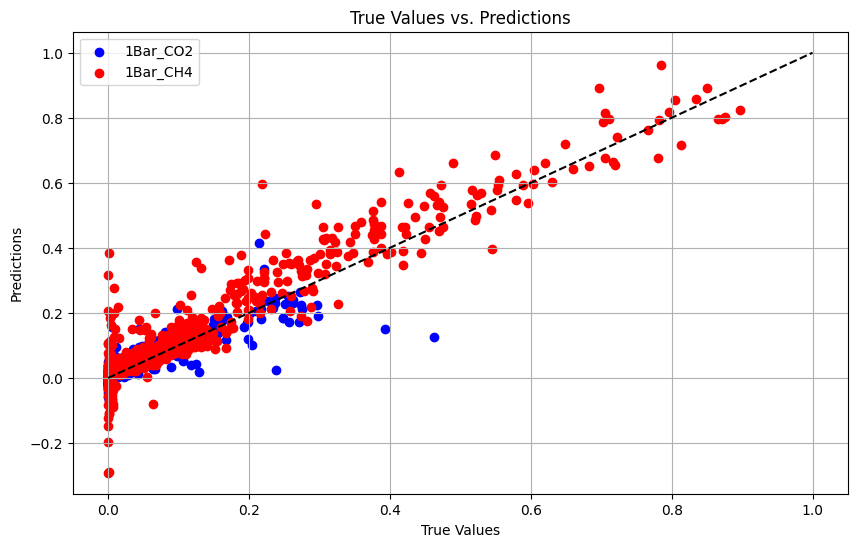

In [62]:
# Plot the predictions against the true values
predictions = predict(model, test_loader1)
true_values = np.vstack([data.y.cpu().numpy() for data in test_loader1])

plt.figure(figsize=(10, 6))
plt.scatter(true_values[:, 0], predictions[:, 0], label='1Bar_CO2', color='blue')
plt.scatter(true_values[:, 1], predictions[:, 1], label='1Bar_CH4', color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
# Hyperparameter tuning
# Hyperparameter tuning_
# Define the hyperparameters to search 
hidden_channels_list = [32, 64, 128] 
learning_rate_list = [0.001, 0.01, 0.1] 
num_epochs = 10
 
# Initialize the best model and best hyperparameters 
best_model = None 
best_hyperparameters = None 
best_loss = float('inf') 
 
# Perform grid search 
for hidden_channels in hidden_channels_list: 
    for learning_rate in learning_rate_list: 
        # Initialize the model 
        model = GNN(node_feature_dim, edge_feature_dim, hidden_channels,  mxene_feature_dim) 
        model.to(device)  # Move model to CUDA 
 
        # Define the optimizer and loss function 
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 
 
        # Train the model 
        train_losses = [] 
        validation_losses = [] 
 
        for epoch in range(num_epochs): 
            train_loss = train(model, optimizer, criterion, train_loader) 
            validation_loss = evaluate(model, criterion, validation_loader) 
            train_losses.append(train_loss) 
            validation_losses.append(validation_loss) 
            print(f"Epoch {epoch + 1}, Train Loss: {train_loss:.4f}, Validation Loss: {validation_loss:.4f}") 
 
        # Evaluate the model on the validation set 
        validation_loss = evaluate(model, criterion, validation_loader) 
 
        # Check if the current model is the best 
        if validation_loss < best_loss: 
            best_loss = validation_loss 
            best_model = model 
            best_hyperparameters = (hidden_channels, learning_rate) 

Epoch 1, Train Loss: 0.0095, Validation Loss: 0.0073
Epoch 2, Train Loss: 0.0070, Validation Loss: 0.0068
Epoch 3, Train Loss: 0.0054, Validation Loss: 0.0051
Epoch 4, Train Loss: 0.0047, Validation Loss: 0.0070
Epoch 5, Train Loss: 0.0043, Validation Loss: 0.0049
Epoch 6, Train Loss: 0.0039, Validation Loss: 0.0036
Epoch 7, Train Loss: 0.0035, Validation Loss: 0.0035
Epoch 8, Train Loss: 0.0033, Validation Loss: 0.0034
Epoch 9, Train Loss: 0.0030, Validation Loss: 0.0032
Epoch 10, Train Loss: 0.0028, Validation Loss: 0.0029
Epoch 1, Train Loss: 0.0151, Validation Loss: 0.0162
Epoch 2, Train Loss: 0.0142, Validation Loss: 0.0113
Epoch 3, Train Loss: 0.0121, Validation Loss: 0.0099
Epoch 4, Train Loss: 0.0118, Validation Loss: 0.0140
Epoch 5, Train Loss: 0.0117, Validation Loss: 0.0110
Epoch 6, Train Loss: 0.0116, Validation Loss: 0.0118
Epoch 7, Train Loss: 0.0114, Validation Loss: 0.0096
Epoch 8, Train Loss: 0.0113, Validation Loss: 0.0104
Epoch 9, Train Loss: 0.0113, Validation Loss:

In [ ]:
# Print the best hyperparameters
print(f"Best Hyperparameters: {best_hyperparameters}")